### Practice Problem 2 
Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?  

Step - 1:

Alternate Hypothesis (Bold claim):$$ H_1: \mu \ > \ 4  $$

Null Hypothesis (Status Quo):$$ H_0: \mu \leq \ 4  $$

Step 2: Collect the Sample of size n = 20 and calculate the sample mean

In [1]:
# Step 2: Collect the Sample of size n = 20 and calculate the sample mean
Sample1 =  [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] 
xbar = sum(Sample1)/len(Sample1)
xbar

4.25

Step 3: Compute Test Statistic: Here in case $\sigma$ (Population Variance is not given) that's we have compute t score by using this formula $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

To Calculate the t score first we have calculate s (Standard Deviation) by using $$ s = \sqrt{\frac{\sum(x_i - \bar{x})^{2}}{n-1}}$$

In [2]:
# Step 3: Compute Test Statistic: Here in case  𝜎  (Population Variance is not given) that's why we have compute t score and 
# To Calculate the t score first we have calculate s (Standard Deviation) 
# Without using Function 
import math

def vari(Sample,ddof=1):
    n = len(Sample)
    mean = sum(Sample)/n
    return sum((x - mean) ** 2 for x in Sample) / (n - ddof)

def stdev(Sample):
    var = vari(Sample)
    s = math.sqrt(var)
    return s

S = stdev([4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5])   

# With using Function
#import statistics 
#statistics.stdev(Sample1)

In [3]:
# Step 3: Now we have to Compute t score 
def t_score(xbar,mu,std_dev,n):
    numerator = xbar - mu 
    denominator = std_dev/math.sqrt(n)
    return numerator/denominator

xbar = sum(Sample1)/len(Sample1)
mu = 4 
std_dev = S
n = len(Sample1)
tscore = t_score(xbar,mu,std_dev,n)
tscore

1.3142574813455419

Step 4: Decide the  significance level or $\alpha$ 

In [4]:
 # Step 4: Decide the  significance level or alpha
import scipy.stats    
confidence_level = 0.95
alpha = 1 - confidence_level  

# After deciding the confidence level or alpha we have to calculate the T Critical value  for two tailed test
# As per our Hypothesis we have to check Two Tailed Test
t_critical = scipy.stats.t.ppf(q=1-.05,df=19)
print(t_critical)


1.729132811521367


Text(4.25, 0.0007, 'x_bar')

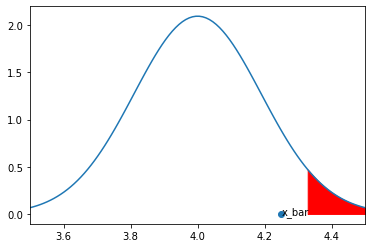

In [10]:
# Now we have to plot sample districbution 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

pop_mean = 4
sample_size = len(Sample1)
sample_mean = xbar
# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = S / (sample_size**0.5)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='red')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

Step 5.1 : If test statistic is t-score (here, we have to consider one tail test (Right Tail Test) so we conculde that:-

q) One tailed t-test:<b> $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$  <b>

In [11]:
# Step 5.1 Conculsion using t test
if(np.abs(tscore) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


Step 5.2 : Compute p-value $ P(Test \ Statistics | H_0) $

b) For one tailed test:$$ p \ value = (1.0 - cdf(test \ statistic)) $$

In [9]:
# Step 5.2 Compute p-value  𝑃(𝑇𝑒𝑠𝑡 𝑆𝑡𝑎𝑡𝑖𝑠𝑡𝑖𝑐𝑠|𝐻0) 
p_value = 2 * (1.0 - norm.cdf(np.abs(tscore)))

print("p_value = ", p_value)

# Conculsion 
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.18875957054112558
Fail to reject Null Hypothesis
